# A typical data science process might look like this:

* Project Scoping / Data Collection
* Exploratory Analysis
* Data Cleaning
* Feature Engineering
* Model Training (including cross-validation to tune hyper-parameters)
* Project Delivery / Insights



https://elitedatascience.com/feature-engineering-best-practices

## Data Collection
* Mostly on our partners to provide
* May append additional information as needed (covered in feature engineering)

# Exploratory Data Analysis (EDA)
### Why EDA
* Understand our data better
* Identify problem areas (missing data, constants, colinearity problems)

In [23]:
import pandas as pd
df = pd.read_csv('ESide Price Predicting v1 1-25-18.csv')

In [2]:
import pandas_profiling

pandas_profiling.ProfileReport(df)

Number of variables,74
Number of observations,5000
Total Missing (%),11.0%
Total size in memory,2.8 MiB
Average record size in memory,592.0 B
Numeric,26
Categorical,43
Boolean,0
Date,0
Text (Unique),0
Rejected,5


## Data Cleaning
### What is data cleaning?
* Duplicate values removal
* Missing values (removal, imputation, etc)
* Data entry issues (typos, etc)
* Outlier handling

# Feature Engineering

### *Coming up with features is difficult, time-consuming, requires expert knowledge. “Applied machine learning” is basically feature engineering. ~ Andrew Ng*

### What is it?
* Feature engineering is the process of creating new features from existing ones to improve model performance.
* There is no cookie cutter approach to feature engineering, it requires critical thinking, it is the 'art' aspect of data science

# The process of feature engineering
* Brainstorming or Testing features
* Deciding what features to create
* Creating features
* Checking how the features work with your model
* Improving your features if needed
* Go back to brainstorming/creating more features until the work is done

https://www.youtube.com/watch?v=drUToKxEAUA

# This talk isn't meant to be exahustive, its meant to show case common techniques

### Look at our dependent variable 'SalesClosePrice'

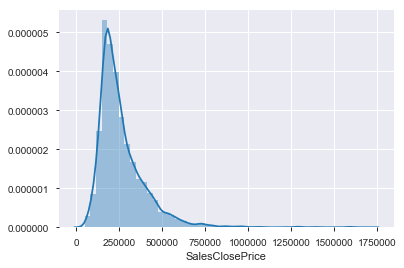

In [3]:
%matplotlib inline
import seaborn as sns


ax = sns.distplot(df['SalesClosePrice'])

### Pretty positively skewed. 
* Consider Log Scaling to get a normal distribution

### Why log scale?
* The residuals have a skewed distribution. The purpose of a transformation is to obtain residuals that are approximately symmetrically distributed.

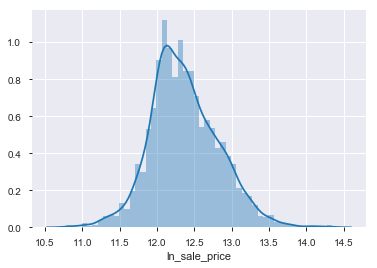

In [4]:
import numpy as np

df['ln_sale_price'] = np.log(df['SalesClosePrice'])

ax = sns.distplot(df['ln_sale_price'])

### Still needs centering to be normal distribution
<img style="float: left;" src="./img/0222c9472478eec2857b8bcbfa4148ece4a11b84.svg">

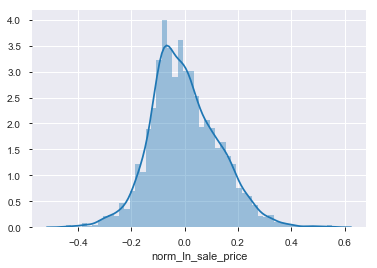

In [5]:
df['norm_ln_sale_price'] = (df['ln_sale_price'] - df['ln_sale_price'].mean()) / (df['ln_sale_price'].max() - df['ln_sale_price'].min())

ax = sns.distplot(df['norm_ln_sale_price'])

### Next let's look at bathrooms

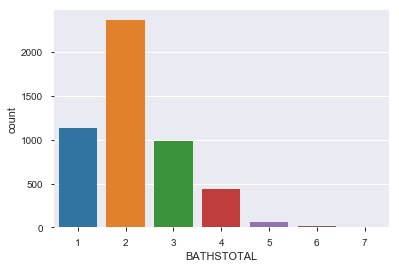

In [6]:
ax = sns.countplot(x="BATHSTOTAL", data=df)

### We can see there is kind of a long tail
* Solve by binning/bucketing

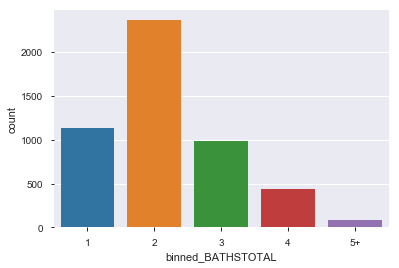

In [7]:
bins = [0, 1, 2, 3, 4, 100]
df['binned_BATHSTOTAL'] = pd.cut(df['BATHSTOTAL'], bins, labels=["1", "2", "3", "4", "5+"])

ax = sns.countplot(df['binned_BATHSTOTAL'])

### What do we do with columns like 'CoolingDescription'?
* May want to piviot them to indicator type columns of True/False
* May also want to bucket some together afterwards...

In [8]:
df['CoolingDescription'].unique()

array(['Central', 'Window', 'None', 'Geothermal ', 'Wall',
       'Central, Window', 'Central, Wall', 'Window, Wall',
       'Ductless Mini-Split', 'Wall, Ductless Mini-Split',
       'Central, Window, Wall', 'Central, Ductless Mini-Split',
       'Window, Ductless Mini-Split'], dtype=object)

In [9]:
df = pd.concat([df, pd.get_dummies(df['CoolingDescription'])], axis=1)

### We can see that each value as a column now

In [10]:
df.columns.values

array(['No.', 'MLSID', 'StreetNumberNumeric', 'streetaddress',
       'STREETNAME', 'PostalCode', 'StateOrProvince', 'City',
       'SalesClosePrice', 'LISTDATE', 'LISTPRICE', 'LISTTYPE',
       'OriginalListPrice', 'PricePerTSFT', 'FOUNDATIONSIZE', 'FENCE',
       'MapLetter', 'LotSizeDimensions', 'SchoolDistrictNumber',
       'DAYSONMARKET', 'offmarketdate', 'Fireplaces', 'RoomArea4',
       'roomtype', 'ROOF', 'RoomFloor4', 'PotentialShortSale',
       'PoolDescription', 'PDOM', 'GarageDescription', 'SQFTABOVEGROUND',
       'Taxes', 'RoomFloor1', 'RoomArea1', 'TAXWITHASSESSMENTS', 'TAXYEAR',
       'LivingArea', 'UNITNUMBER', 'YEARBUILT', 'ZONING', 'STYLE', 'ACRES',
       'CoolingDescription', 'APPLIANCES', 'backonmarketdate',
       'ROOMFAMILYCHAR', 'RoomArea3', 'EXTERIOR', 'RoomFloor3',
       'RoomFloor2', 'RoomArea2', 'DiningRoomDescription', 'BASEMENT',
       'BathsFull', 'BathsHalf', 'BATHQUARTER', 'BATHSTHREEQUARTER',
       'Class', 'BATHSTOTAL', 'BATHDESC', 'RoomArea5'

### Extracting features from text
* Consider 'ROOF'

In [11]:
df['ROOF'].unique()

array([nan, 'Asphalt Shingles, Pitched, Age 8 Years or Less',
       'Asphalt Shingles, Age Over 8 Years',
       'Asphalt Shingles, Age 8 Years or Less', 'Asphalt Shingles',
       'Asphalt Shingles, Pitched, Age Over 8 Years',
       'Age 8 Years or Less', 'Asphalt Shingles, Pitched',
       'Pitched, Age 8 Years or Less', 'Flat, Tar/Gravel', 'Flat',
       'Age Over 8 Years', 'Asphalt Shingles, Age Over 8 Years, Rubber',
       'Flat, Tar/Gravel, Rubber',
       'Asphalt Shingles, Pitched, Age Over 8 Years, Rubber',
       'Unspecified Shingle', 'Pitched, Age Over 8 Years',
       'Asphalt Shingles, Rubber', 'Metal',
       'Asphalt Shingles, Pitched, Flat, Age 8 Years or Less, Age Over 8 Years, Rubber',
       'Asphalt Shingles, Flat, Tar/Gravel, Age Over 8 Years, Rubber',
       'Pitched',
       'Asphalt Shingles, Age 8 Years or Less, Age Over 8 Years',
       'Pitched, Unspecified Shingle',
       'Unspecified Shingle, Age Over 8 Years', 'Asphalt Shingles, Flat',
       'Flat, R

### It'd be nice to have a variable for roof age

In [12]:
roof_age_vals = ['Age Over 8 Years', 'Age 8 Years or Less']
df['roof_age'] = np.nan

for index, row in df.iterrows():
    if pd.notnull(row['ROOF']): 
        for age in roof_age_vals:
            if age in row['ROOF']:
                df.loc[index, 'roof_age'] = age

In [13]:
df[['roof_age']].head()

,roof_age
0,NaN
1,Age 8 Years or Less
2,NaN
3,Age 8 Years or Less
4,Age Over 8 Years


### Calculate new metrics
* Many of these are already in the data set but not always
* Clicks + Sales => Click Through Rate
* Finish SQFT / Price => Price per SQFT

In [14]:
df.columns.values

array(['No.', 'MLSID', 'StreetNumberNumeric', 'streetaddress',
       'STREETNAME', 'PostalCode', 'StateOrProvince', 'City',
       'SalesClosePrice', 'LISTDATE', 'LISTPRICE', 'LISTTYPE',
       'OriginalListPrice', 'PricePerTSFT', 'FOUNDATIONSIZE', 'FENCE',
       'MapLetter', 'LotSizeDimensions', 'SchoolDistrictNumber',
       'DAYSONMARKET', 'offmarketdate', 'Fireplaces', 'RoomArea4',
       'roomtype', 'ROOF', 'RoomFloor4', 'PotentialShortSale',
       'PoolDescription', 'PDOM', 'GarageDescription', 'SQFTABOVEGROUND',
       'Taxes', 'RoomFloor1', 'RoomArea1', 'TAXWITHASSESSMENTS', 'TAXYEAR',
       'LivingArea', 'UNITNUMBER', 'YEARBUILT', 'ZONING', 'STYLE', 'ACRES',
       'CoolingDescription', 'APPLIANCES', 'backonmarketdate',
       'ROOMFAMILYCHAR', 'RoomArea3', 'EXTERIOR', 'RoomFloor3',
       'RoomFloor2', 'RoomArea2', 'DiningRoomDescription', 'BASEMENT',
       'BathsFull', 'BathsHalf', 'BATHQUARTER', 'BATHSTHREEQUARTER',
       'Class', 'BATHSTOTAL', 'BATHDESC', 'RoomArea5'

In [15]:
#SalesClosePrice, 'PricePerTSFT', 'SQFTABOVEGROUND'
df['price_per_living_sqft'] = df['SalesClosePrice'] / (df['LivingArea'])
df[['price_per_living_sqft', 'PricePerTSFT']].head()

,price_per_living_sqft,PricePerTSFT
0,145.918367,145.9184
1,85.278276,85.2783
2,204.174229,204.1742
3,162.377451,162.3775
4,121.783626,121.7836


### How about if we want to know how many houses were on the market at the same time?
* Could go futher and consider only compariables
* Could build a compeitive ranking

In [24]:
min_date = pd.to_datetime(df['LISTDATE']).min()
min_date

Timestamp('2017-02-23 00:00:00')

In [25]:
max_date = pd.to_datetime(df['offmarketdate']).max()
max_date

Timestamp('2018-01-24 00:00:00')

In [26]:
from datetime import date, timedelta

# this will give you a list containing all of the dates
dd = [min_date + timedelta(days=x) for x in range((max_date-min_date).days + 1)]

daily_listings = pd.DataFrame()
daily_listings['date'] = dd
daily_listings.set_index(['date'], inplace=True)
daily_listings['num_listings'] = 0

# TODO do we only have sold houses?
for day_index, day in daily_listings.iterrows():
    # loop through listings
    listing_count = 0
    for listing_index, listing_row in df.iterrows():
        
        min_date = pd.to_datetime(listing_row['LISTDATE'])
        max_date = pd.to_datetime(listing_row['offmarketdate'])
        
        # check to see if index of daily_listings is between the 'LISTDATE' and 'offmarketdate' of a house
        if (min_date <= day_index <= max_date):
            listing_count += 1
    daily_listings.loc[day_index, 'num_listings'] = listing_count

### Join new feature back to dataframe

In [27]:
df = df.join(daily_listings, how='inner')

In [28]:
df[['norm_ln_sale_price', 'num_listings']].head()

KeyError: "['norm_ln_sale_price'] not in index"

In [29]:
g = sns.lmplot(x="num_listings", y="norm_ln_sale_price", data=df)

KeyError: "['norm_ln_sale_price'] not in index"

### Is there seasonality we should consider?
* Many ways to handle seasonality

In [ ]:
daily_listings['month_of_year'] = daily_listings.index.month

monthly_df = daily_listings.groupby(['month_of_year'])['num_listings'].mean().reset_index()

ax = sns.barplot(x="month_of_year", y="num_listings", data=monthly_df)

In [ ]:
monthly_df['month_of_year'].unique()

### Supplementing our data
* Acquire additional data and join to our data set
* Care must be taken for relevance (grainularity, timeliness, etc)

### API Route
* Preferred way
    * Less brittle
    * Legal :-)

https://www.walkscore.com/professional/api.php

### Reverse Engineer API's with Fidder

https://rc.education.state.mn.us/

In [ ]:
import requests

url = 'https://rc.education.state.mn.us/rcapi/reportCard/getMySchoolData?orgName=Minneapolis+Public+School+District&orgId=30001000000&groupType=district'
r = requests.get(url)

In [ ]:
school_df = pd.read_json(r.json())

### Scraping
* Really brittle
* Breaks TOS

https://github.com/ChrisMuir/Zillow